### Import Library

In [110]:
# Standard data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error
import pickle

# Deep Learning
from tensorflow import keras

### Loading Data

In [15]:
df = pd.read_csv('../Data/Sales Harian')
df.drop('Order Date',axis=1,inplace=True)

In [16]:
df.head()

,Day Order,Month Order,Year Order,Price Total
0,1,1,2019,65681.94
1,2,1,2019,70813.20
2,3,1,2019,47046.20
3,4,1,2019,62012.21
4,5,1,2019,46524.63


### Pemisahan data

In [17]:
train = df.drop('Price Total',axis=1)
target = df['Price Total']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(train,target)

### Machine Learning

In [19]:
def evaluate(y_pred,y_true):
    print(f'MAE : {mean_absolute_error(y_true,y_pred)}')
    print(f'MAE : {mean_squared_error(y_true,y_pred)}')

In [20]:
# Linear Regresion
lr = LinearRegression()
lr.fit(x_train,y_train)
evaluate(lr.predict(x_test),y_test)

MAE : 18245.525282416922
MAE : 496339519.8369891


In [21]:
# Ridge
rid = Ridge(alpha=.5)
rid.fit(x_train,y_train)
evaluate(rid.predict(x_test),y_test)

MAE : 18245.507180880868
MAE : 496340235.1531433


### Prediksi Data

In [24]:
df_predict = pd.read_csv('../Data/Harian Bulan Januari').drop('Unnamed: 0',axis=1)

In [27]:
df_result = pd.Series(lr.predict(df_predict),pd.date_range(start ='1-1-2020',end ='31-01-2020', freq ='1D'))

In [126]:
df_result.tail()

2020-01-27    73534.849801
2020-01-28    73679.510027
2020-01-29    73824.170252
2020-01-30    73968.830478
2020-01-31    74113.490703
Freq: D, dtype: float64

In [129]:
df['Price Total']

[126628.05000000028,
 134015.50000000015,
 156024.61999999994,
 152319.80999999994,
 131454.29999999993]

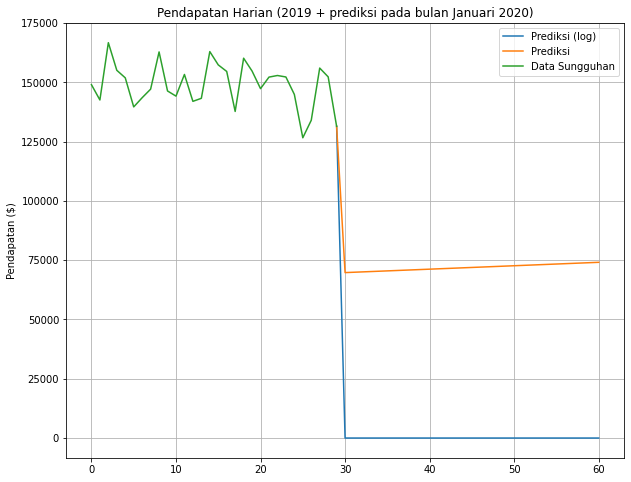

In [146]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(29,61),df['Price Total'].iloc[-1:].append(np.log(df_result)),label='Prediksi (log)')
plt.plot(np.arange(29,61),df['Price Total'].iloc[-1:].append(df_result),label='Prediksi')
plt.plot(np.arange(30),df['Price Total'].iloc[-30:].to_list(),label='Data Sungguhan')
plt.title('Pendapatan Harian (2019 + prediksi pada bulan Januari 2020)')
plt.ylabel('Pendapatan ($)')
plt.grid()
plt.legend()
plt.savefig('../Output/Prediksi Pendapatan')
plt.show()

/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


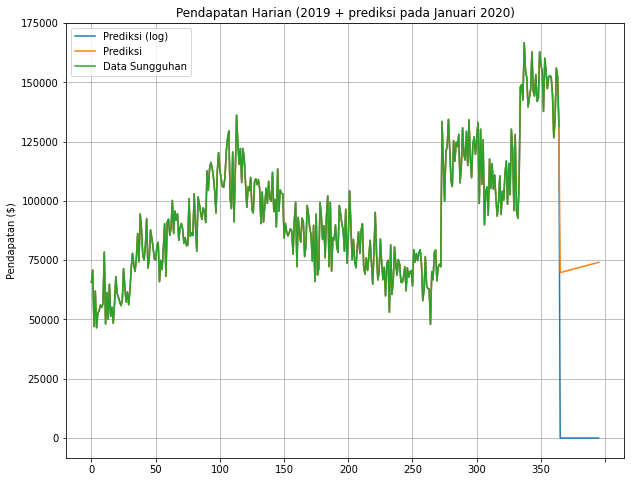

In [118]:
plt.figure(figsize=(10,8))
df['Price Total'].append(np.log(df_result)).plot(label='Prediksi (log)')
df['Price Total'].append(df_result).plot(label='Prediksi')
df['Price Total'].plot(label='Data Sungguhan')
plt.title('Pendapatan Harian (2019 + prediksi pada Januari 2020)')
plt.ylabel('Pendapatan ($)')
plt.grid()
plt.legend()
plt.savefig('../Output/Prediksi Pendapatan')
plt.show()

### Membuat Sequence Data

In [30]:
def split_sequence(sequence, n_steps=3):
    sequence = list(sequence)
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    def reshape(d):
        d = np.array(d)
        d = np.reshape(d,(d.shape[0],d.shape[1],1))
        return d
    return reshape(X), np.array(y)

In [34]:
train_data = df['Price Total'].iloc[:250]
test_data = df['Price Total'].iloc[250:]

In [35]:
x_train,y_train = split_sequence(train_data)
x_test,y_test = split_sequence(test_data)

### Recurrent Neural Network (RNN)

In [42]:
model = keras.Sequential([
    keras.layers.LSTM(64,input_shape=(3,1,),activation='relu',return_sequences=True),
    keras.layers.LSTM(64,activation='relu'),
    keras.layers.Dense(1)
])

In [43]:
model.compile(loss='mse',optimizer='adam')

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 64)             16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


### Early Stopping

In [45]:
earlyStoping = keras.callbacks.EarlyStopping(monitor='loss',patience=3)

### Training

In [47]:
history = model.fit(x_train,y_train,epochs=100,batch_size=32,callbacks=[earlyStoping],verbose=2)

Epoch 1/100
8/8 - 0s - loss: 7223433216.0000
Epoch 2/100
8/8 - 0s - loss: 6960275456.0000
Epoch 3/100
8/8 - 0s - loss: 6680912896.0000
Epoch 4/100
8/8 - 0s - loss: 6494960640.0000
Epoch 5/100
8/8 - 0s - loss: 6112196096.0000
Epoch 6/100
8/8 - 0s - loss: 5431271936.0000
Epoch 7/100
8/8 - 0s - loss: 4599966208.0000
Epoch 8/100
8/8 - 0s - loss: 3707493632.0000
Epoch 9/100
8/8 - 0s - loss: 2652187648.0000
Epoch 10/100
8/8 - 0s - loss: 1572088832.0000
Epoch 11/100
8/8 - 0s - loss: 683494528.0000
Epoch 12/100
8/8 - 0s - loss: 184044656.0000
Epoch 13/100
8/8 - 0s - loss: 112993864.0000
Epoch 14/100
8/8 - 0s - loss: 140288144.0000
Epoch 15/100
8/8 - 0s - loss: 109963280.0000
Epoch 16/100
8/8 - 0s - loss: 125929640.0000
Epoch 17/100
8/8 - 0s - loss: 114716640.0000
Epoch 18/100
8/8 - 0s - loss: 97596304.0000
Epoch 19/100
8/8 - 0s - loss: 96531392.0000
Epoch 20/100
8/8 - 0s - loss: 97964672.0000
Epoch 21/100
8/8 - 0s - loss: 96799336.0000
Epoch 22/100
8/8 - 0s - loss: 97164576.0000


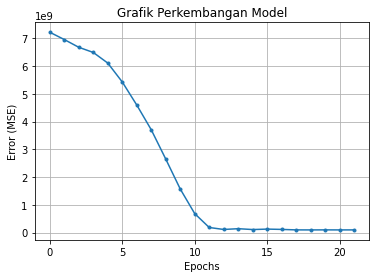

In [147]:
plt.plot(history.history['loss'],marker='.')
plt.title('Grafik Perkembangan Model')
plt.xlabel('Epochs')
plt.ylabel('Error (MSE)')
plt.grid()
plt.savefig('../Output/Latihan NN Model')
plt.show()

### Prediksi Test Data

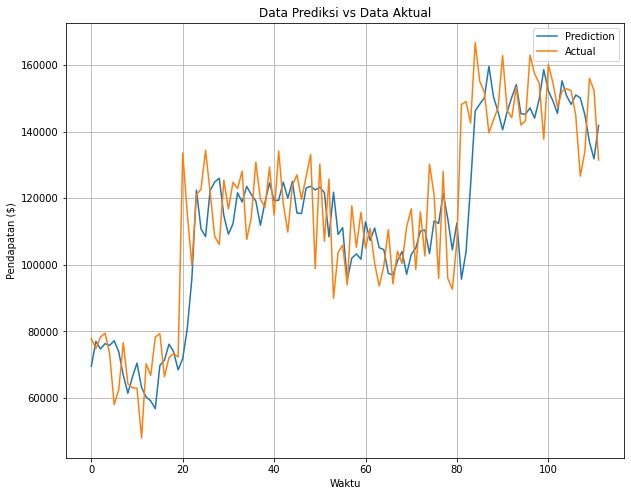

In [148]:
plt.figure(figsize=(10,8))
plt.plot(model.predict(x_test),label='Prediction')
plt.plot(y_test,label='Actual')
plt.legend()
plt.grid()
plt.title('Data Prediksi vs Data Aktual')
plt.xlabel('Waktu')
plt.ylabel('Pendapatan ($)')
plt.savefig('../Output/Demonstrasi Prediksi NN Model')
plt.show()

### Prediksi Kedepan

In [60]:
def predict_future(shift_count):
    def reshape(three):
        return np.array(three).reshape(1,3,1) 
    array =  list(df['Price Total']) + []
    now = len(df['Price Total'])-3
    last = len(df['Price Total'])
    for _ in range(shift_count):
        converted = reshape(array[now:last])
        array.append(model.predict(converted)[0][0])
        now += 1
        last += 1
    return array

In [71]:
future_prediction = predict_future(30)

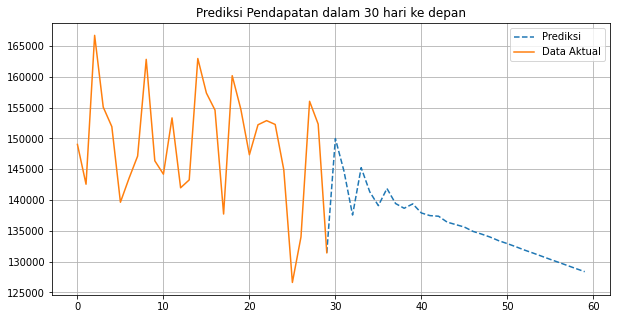

In [153]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(29,60),future_prediction[-31:],'--',label='Prediksi')
plt.plot(np.arange(30),df['Price Total'][-30:],label='Data Aktual')
plt.title('Prediksi Pendapatan dalam 30 hari ke depan')
plt.grid()
plt.savefig('../Output/Prediksi Dengan NN Model')
plt.legend();

### Simpan Model

In [109]:
# Simpan keras nn model
model.save('../Models/RNN-LSTM.h5')

In [111]:
# Simpan machine learning model dengan pickle
with open('../Models/ML-LR.pkl','wb') as file:
    pickle.dump(lr,file)